# 💳 Credit Card Fraud Detection using Machine Learning

## Project Overview
Credit card fraud detection is a binary classification problem where fraudulent transactions are rare.
The objective of this project is to build a machine learning model that can accurately identify fraudulent
transactions while minimizing false negatives.

**Type:** Supervised Machine Learning  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## 2. Dataset Overview

The dataset contains credit card transaction details.
Each transaction is labeled as fraudulent or non-fraudulent.

- Rows represent individual transactions
- Columns represent transaction features
- Target variable indicates fraud (1) or normal transaction (0)


### EDA Observations

- The dataset is highly imbalanced, with fraudulent transactions forming a very small percentage.
- Most transactions are non-fraudulent, making accuracy an unreliable metric.
- Specialized evaluation metrics like Recall and Precision are required.


In [4]:
# Getting the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [32]:
df.shape

(284807, 31)

In [5]:
# Checking if the data have any null values.
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [33]:
df.duplicated().sum()

np.int64(1081)

In [6]:
df['Class'].value_counts()
# in this data 0 = normal transaction, 1 = fraud transaction

,count
Class,
0,284315
1,492



Fraud detection datasets are usually highly imbalanced.
Visualizing the class distribution helps us understand the challenge.


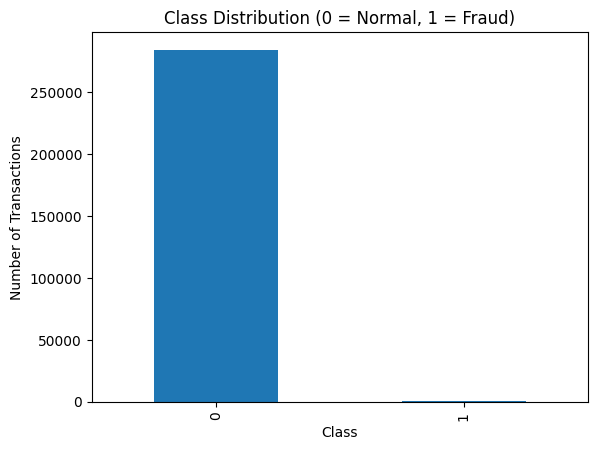

In [36]:
import matplotlib.pyplot as plt

class_counts = df['Class'].value_counts()

plt.figure()
class_counts.plot(kind='bar')
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
plt.show()


The data is unbalance,
we need to separate the data according to the class

In [7]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [8]:
legit.shape

(284315, 31)

In [9]:
fraud.shape

(492, 31)

In [10]:
# Statistical analysis
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [11]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [12]:
# Comparing their mean
df.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
# Building a new dataset similar distribution as normal and fraud trasaction
legit_df = legit.sample(n=492)

In [14]:
# Now concatinating both FRAUD DATA and LEGIT DATA
new_df = pd.concat([legit_df, fraud], axis=0)

In [15]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
178701,123740.0,2.255123,-0.582783,-2.166698,-1.079161,0.057986,-1.276281,0.084262,-0.387189,-1.056495,...,0.368581,1.015215,-0.097436,-0.359145,0.414741,0.089762,-0.085813,-0.098140,7.90,0
279859,169139.0,1.642309,-0.711310,-0.490941,1.275491,-0.592376,-0.015954,-0.415453,0.092496,0.735361,...,0.341479,0.734089,-0.041797,-0.359029,-0.151550,-0.575768,0.020253,-0.017755,159.00,0
252658,155910.0,0.011628,0.650544,0.108602,-0.769162,0.495364,-0.622588,0.783758,0.066420,-0.005874,...,-0.251691,-0.678884,0.042491,-0.463163,-0.525860,0.150912,0.229242,0.079983,7.14,0
106646,70054.0,1.236444,0.286534,0.184558,0.500265,-0.160708,-0.559753,-0.030280,-0.029359,-0.188255,...,-0.258960,-0.787736,0.076741,-0.045383,0.226879,0.097992,-0.028059,0.017065,1.98,0
155864,106638.0,-0.494702,0.744741,2.311919,-0.130341,0.085691,-0.279549,0.502726,-0.220246,1.653252,...,-0.323923,-0.532757,-0.291416,-0.238560,0.258824,-0.718149,-0.088709,-0.148446,11.27,0


In [16]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
 new_df['Class'].value_counts()

,count
Class,
0,492
1,492


Spltting the data accorting to **Feature** and **Targets**

In [19]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 178701 to 281674
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    984 non-null    float64
 1   V1      984 non-null    float64
 2   V2      984 non-null    float64
 3   V3      984 non-null    float64
 4   V4      984 non-null    float64
 5   V5      984 non-null    float64
 6   V6      984 non-null    float64
 7   V7      984 non-null    float64
 8   V8      984 non-null    float64
 9   V9      984 non-null    float64
 10  V10     984 non-null    float64
 11  V11     984 non-null    float64
 12  V12     984 non-null    float64
 13  V13     984 non-null    float64
 14  V14     984 non-null    float64
 15  V15     984 non-null    float64
 16  V16     984 non-null    float64
 17  V17     984 non-null    float64
 18  V18     984 non-null    float64
 19  V19     984 non-null    float64
 20  V20     984 non-null    float64
 21  V21     984 non-null    float64
 22 

In [21]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 984 entries, 178701 to 281674
Series name: Class
Non-Null Count  Dtype
--------------  -----
984 non-null    int64
dtypes: int64(1)
memory usage: 15.4 KB


Spliting the data into **TRAIN** and **TEST** data

In [22]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [23]:
X.shape, X_train.shape, X_test.shape

((984, 30), (787, 30), (197, 30))

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Handling Imbalanced Data using SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) is used to handle class imbalance
by generating synthetic samples for the minority (fraud) class.


In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_scaled, Y_train
)

print("Before SMOTE:")
print(Y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
Class
1    394
0    393
Name: count, dtype: int64

After SMOTE:
Class
1    394
0    394
Name: count, dtype: int64


### **Model Traning**

Logistic Regression

In [37]:
model = LogisticRegression()

In [38]:
# traning th elogistic regressiion model with traning data
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

 Model Training


In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_smote, y_train_smote)

y_pred_lr = lr.predict(X_test_scaled)


In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_smote, y_train_smote)

y_pred_rf = rf.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


## Model Evaluation

In fraud detection, we focus on metrics like Precision, Recall and F1-score.
Recall is especially important because missing a fraud transaction is costly.


In [46]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(name, y_true, y_pred):
    print(f"===== {name} =====")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))


In [48]:
evaluate_model("Logistic Regression", Y_test, y_pred_lr)
evaluate_model("Random Forest", Y_test, y_pred_rf)

===== Logistic Regression =====

Confusion Matrix:
[[98  1]
 [12 86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        99
           1       0.99      0.88      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

===== Random Forest =====

Confusion Matrix:
[[ 2 97]
 [ 0 98]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        99
           1       0.50      1.00      0.67        98

    accuracy                           0.51       197
   macro avg       0.75      0.51      0.35       197
weighted avg       0.75      0.51      0.35       197



In [50]:
# Logistic Regression probabilities
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]
roc_lr = roc_auc_score(Y_test, y_prob_lr)

# Random Forest probabilities
y_prob_rf = rf.predict_proba(X_test)[:, 1]
roc_rf = roc_auc_score(Y_test, y_prob_rf)

print("ROC-AUC Score (Logistic Regression):", roc_lr)
print("ROC-AUC Score (Random Forest):", roc_rf)

ROC-AUC Score (Logistic Regression): 0.9801071943929087
ROC-AUC Score (Random Forest): 0.9331581117295406


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


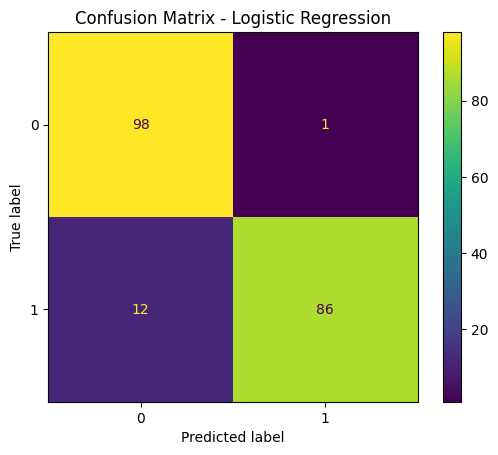

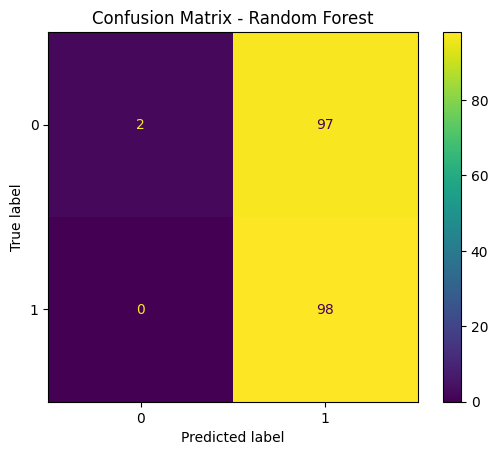

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_lr)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_rf)
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [26]:
# Accuracy score  on traning data
X_train_prediction = model.predict(X_train)
traning_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [27]:
print('Accuracy on Traning data : ', traning_data_accuracy)

Accuracy on Traning data :  0.9491740787801779


In [28]:
# Accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [29]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9289340101522843


 Final Model Selection

Based on evaluation metrics such as Recall, F1-score and ROC-AUC,
the Random Forest model performs better for detecting fraudulent transactions.
Therefore, Random Forest is selected as the final model.


In [53]:
import joblib

# Save trained model
joblib.dump(rf, "fraud_model.pkl")

# Save scaler (needed for Streamlit)
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


## Conclusion and Future Work

### Conclusion
In this project, a machine learning model was developed to detect credit card fraud.
Handling class imbalance using SMOTE significantly improved fraud detection performance.
Random Forest achieved better results compared to the baseline model.

### Future Work
- Use advanced models like XGBoost
- Perform hyperparameter tuning
- Deploy the model as a web application using Streamlit
